In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

In [2]:
def test():
    print("Success")

### Adam Candrák/Mária Matušisková - 50%/50%

# Imports

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Phase 1 - Exploratory analysis

## 1.1 Basic description of the data together with characteristics
### EDA with visualization
-------------------------------------------------------------------------------------------
#### Analysis of data structures such as files (structures and relations, number, types, ...), records (structures, number of records, number of attributes, types, ...)


#### *1. Load dataset Connections*

In [4]:
connections_file = "../data/Connections.csv"
devices_file = "../data/Devices.csv"
processes_file = "../data/Processes.csv"
profiles_file = "../data/Profiles.csv"

connections = pd.read_csv(connections_file, sep='\t')
devices = pd.read_csv(devices_file, sep='\t')
processes = pd.read_csv(processes_file, sep='\t')
profiles = pd.read_csv(profiles_file, sep='\t')

#### *2. Explore data*
- **Connections** - Data represents a collection of logs from the mobile device connection. There are 13 columns:
    - ts - timestamp
    - imei - International Mobile Equipment Identity - It is a unique number that helps identify device or track it when it is lost. Furthermore, it is preventing from unauthorized network access.
    - mwra - indicates malware-related-activity in one time interval
    - c.katana - usage of the Facebook app
    - c.android.chrome - usage of the Chrome app
    - c.android.gm - usage of the Gmail app
    - c.dogalize - usage of the Dogalize app
    - c.android.youtube - usage of the YouTube app
    - c.updateassist - might be a system app which updates something on the device
    - c.UCMobile.intl - usage of UC Browser, which can be built in the mobile device
    - c.raider - usage of Raider app - it is a game probably
    - c.android.vending - refers to Google Play Store
    - c.UCMobile.x86 - usage of UC Browser, which can be built in the mobile device but with x86 architecture

In [5]:
connections.columns

Index(['ts', 'imei', 'mwra', 'c.katana', 'c.android.chrome', 'c.android.gm',
       'c.dogalize', 'c.android.youtube', 'c.updateassist', 'c.UCMobile.intl',
       'c.raider', 'c.android.vending', 'c.UCMobile.x86'],
      dtype='object')

The types of columns:

In [6]:
connections.dtypes

ts                    object
imei                   int64
mwra                 float64
c.katana             float64
c.android.chrome     float64
c.android.gm         float64
c.dogalize           float64
c.android.youtube    float64
c.updateassist       float64
c.UCMobile.intl      float64
c.raider             float64
c.android.vending    float64
c.UCMobile.x86       float64
dtype: object

The dataset connections has 196 196 records.

In [7]:
connections.size

196196

See first rows of the dataset:

In [8]:
connections.head()

ts                 imei  mwra  c.katana  c.android.chrome  \
0  2018-05-05 10:00:00  3590433799317662188   1.0  10.99774          11.05477   
1  2018-05-05 10:01:00  3590433799317662394   1.0  11.08234           9.64636   
2  2018-05-05 10:02:00  3590433799317661834   0.0  11.49582          12.27416   
3  2018-05-05 10:03:00  8630330696303481289   0.0  10.50935          11.41774   
4  2018-05-05 10:04:00  8630330696303481149   0.0  10.25989          14.46448   

   c.android.gm  c.dogalize  c.android.youtube  c.updateassist  \
0       6.03999    12.49767            8.59956        14.00953   
1       8.64167    12.60788            9.84197        38.27736   
2      11.59681    12.99258            9.74923        57.41411   
3      14.43350    12.91018           13.93857        31.57549   
4      14.02728     8.58832           13.04853        49.47100   

   c.UCMobile.intl  c.raider  c.android.vending  c.UCMobile.x86  
0         52.54470  43.93493           66.86890        46.35705  
1         44.56009  47.40309            9.56533        33.53140  
2         36.83333  58.51427           45.83339        20.26636  
3         41.34296  60.12589           81.04877        80.43563  
4         38.86755  57.83154           28.15473        43.36029

See more info about the dataset... There is a rule that the columns should not have a null value.

In [9]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15092 non-null  object 
 1   imei               15092 non-null  int64  
 2   mwra               15092 non-null  float64
 3   c.katana           15092 non-null  float64
 4   c.android.chrome   15092 non-null  float64
 5   c.android.gm       15092 non-null  float64
 6   c.dogalize         15092 non-null  float64
 7   c.android.youtube  15092 non-null  float64
 8   c.updateassist     15092 non-null  float64
 9   c.UCMobile.intl    15092 non-null  float64
 10  c.raider           15092 non-null  float64
 11  c.android.vending  15092 non-null  float64
 12  c.UCMobile.x86     15092 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Let's see descriptive statistics for a data distribution:
- count - the final number of the non-null values
- mean - the average of the values in the each column
- std - the standard deviation (how spread out the data are)
- min - the smallest value in the each column
- 25% - the value closest to the 25% metric of data
- 50% - the value closest to the 50% metric of data
- 75% - the value closest to the 75% metric of data
- max - the highest value in the each column

In [10]:
connections.describe()

imei          mwra      c.katana  c.android.chrome  \
count  1.509200e+04  15092.000000  15092.000000      15092.000000   
mean   3.917358e+18      0.626093     10.967173         11.601913   
std    3.343123e+18      0.483855      2.672212          2.576451   
min    3.590434e+17      0.000000      1.639510          2.985830   
25%    8.630331e+17      0.000000      9.079035          9.686500   
50%    3.590434e+18      1.000000     10.863685         11.462210   
75%    8.630331e+18      1.000000     12.814152         13.487845   
max    8.630331e+18      1.000000     21.046730         20.927980   

       c.android.gm    c.dogalize  c.android.youtube  c.updateassist  \
count  15092.000000  15092.000000       15092.000000    15092.000000   
mean      12.255218     10.451356          12.241718       45.995032   
std        2.563193      2.292431           2.561090       12.501465   
min        1.596520      2.971390           3.167750        0.000000   
25%       10.666015      8.896942          10.424260       37.485313   
50%       12.563215     10.245800          12.346030       46.017320   
75%       14.059870     11.790168          14.103033       54.409880   
max       20.238460     20.303620          21.411230      100.000000   

       c.UCMobile.intl      c.raider  c.android.vending  c.UCMobile.x86  
count     15092.000000  15092.000000       15092.000000    15092.000000  
mean         45.847281     49.189666          49.636194       49.758584  
std          13.067914     13.357856          28.917318       28.693358  
min           0.000000      0.000000           0.000000        0.000000  
25%          37.116653     40.244102          24.365138       25.365020  
50%          45.841985     49.110105          49.546135       49.822055  
75%          54.669180     58.244978          74.764725       74.106212  
max         100.000000    100.000000         100.000000      100.000000

In [11]:
connections.describe(exclude=np.number)

ts
count                 15092
unique                14913
top     2018-05-14 03:05:00
freq                      2

Number of rows and columns:

In [12]:
connections.shape

(15092, 13)

#### *3. Analyze Data Structure*

Count elements (distinct)

In [13]:
connections.nunique()

ts                   14913
imei                   500
mwra                     2
c.katana             14797
c.android.chrome     14776
c.android.gm         14792
c.dogalize           14755
c.android.youtube    14784
c.updateassist       14886
c.UCMobile.intl      14888
c.raider             14878
c.android.vending    14901
c.UCMobile.x86       14905
dtype: int64

-----------------------------------------------------
#### Analysis of individual attributes: for selected significant attributes (min 10), analyze their distributions and basic descriptive statistics.

Let's measure mean, median, mode:

In [14]:
connections['mwra'].mean()

np.float64(0.6260932944606414)

In [15]:
connections['mwra'].median()

np.float64(1.0)

In [16]:
stats.mode(connections['mwra'])

ModeResult(mode=np.float64(1.0), count=np.int64(9449))

Summarize the distribution of various usages of apps, while excluding imei and ts, because those are not numerical values.

Text(0.5, 1.0, 'Box Plot of Connections Data')

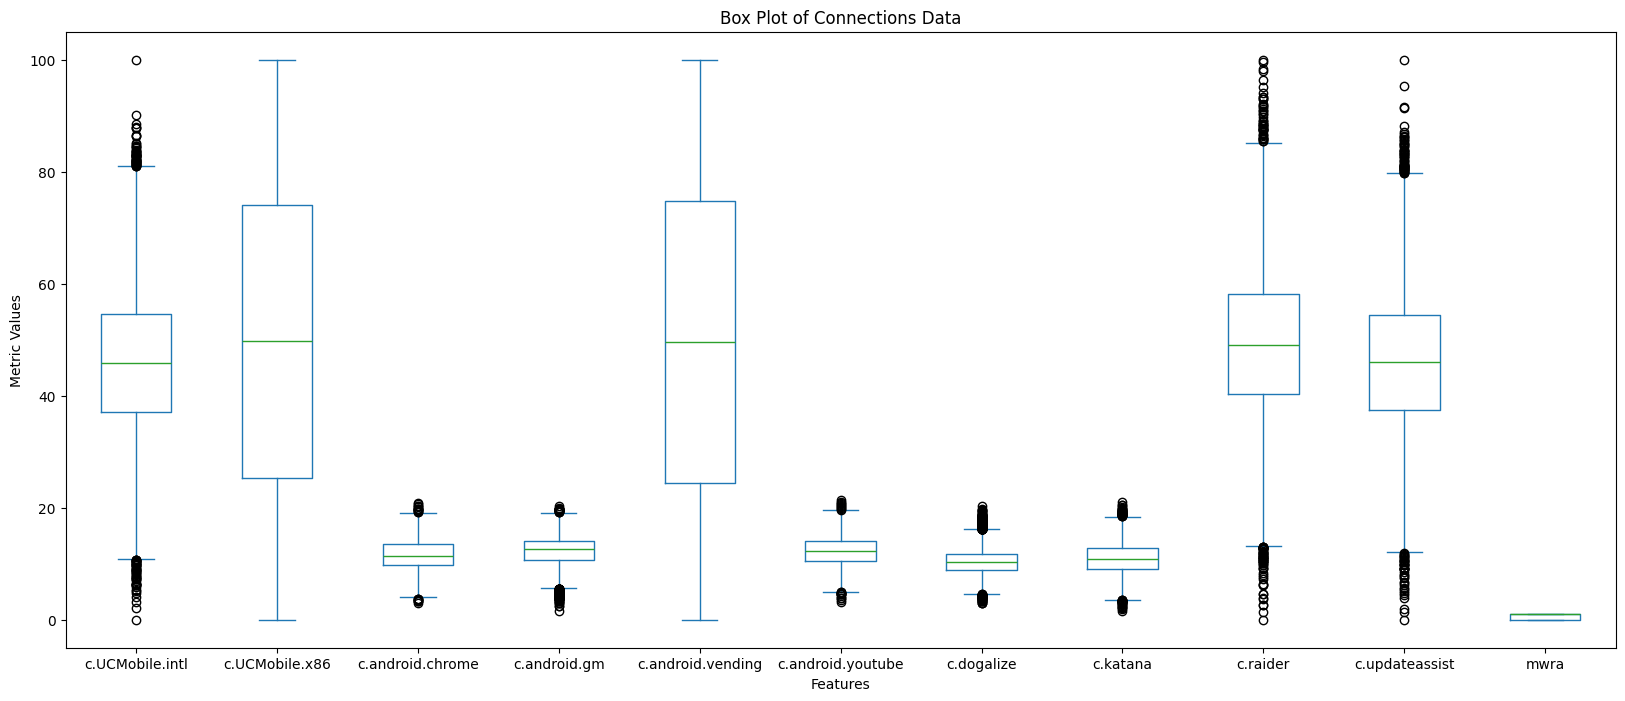

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))

connections[connections.columns.difference(['imei', 'ts'])].plot.box(ax=ax)

plt.xlabel('Features')
plt.ylabel('Metric Values')
plt.title('Box Plot of Connections Data')

Show occurrences of values in the data:

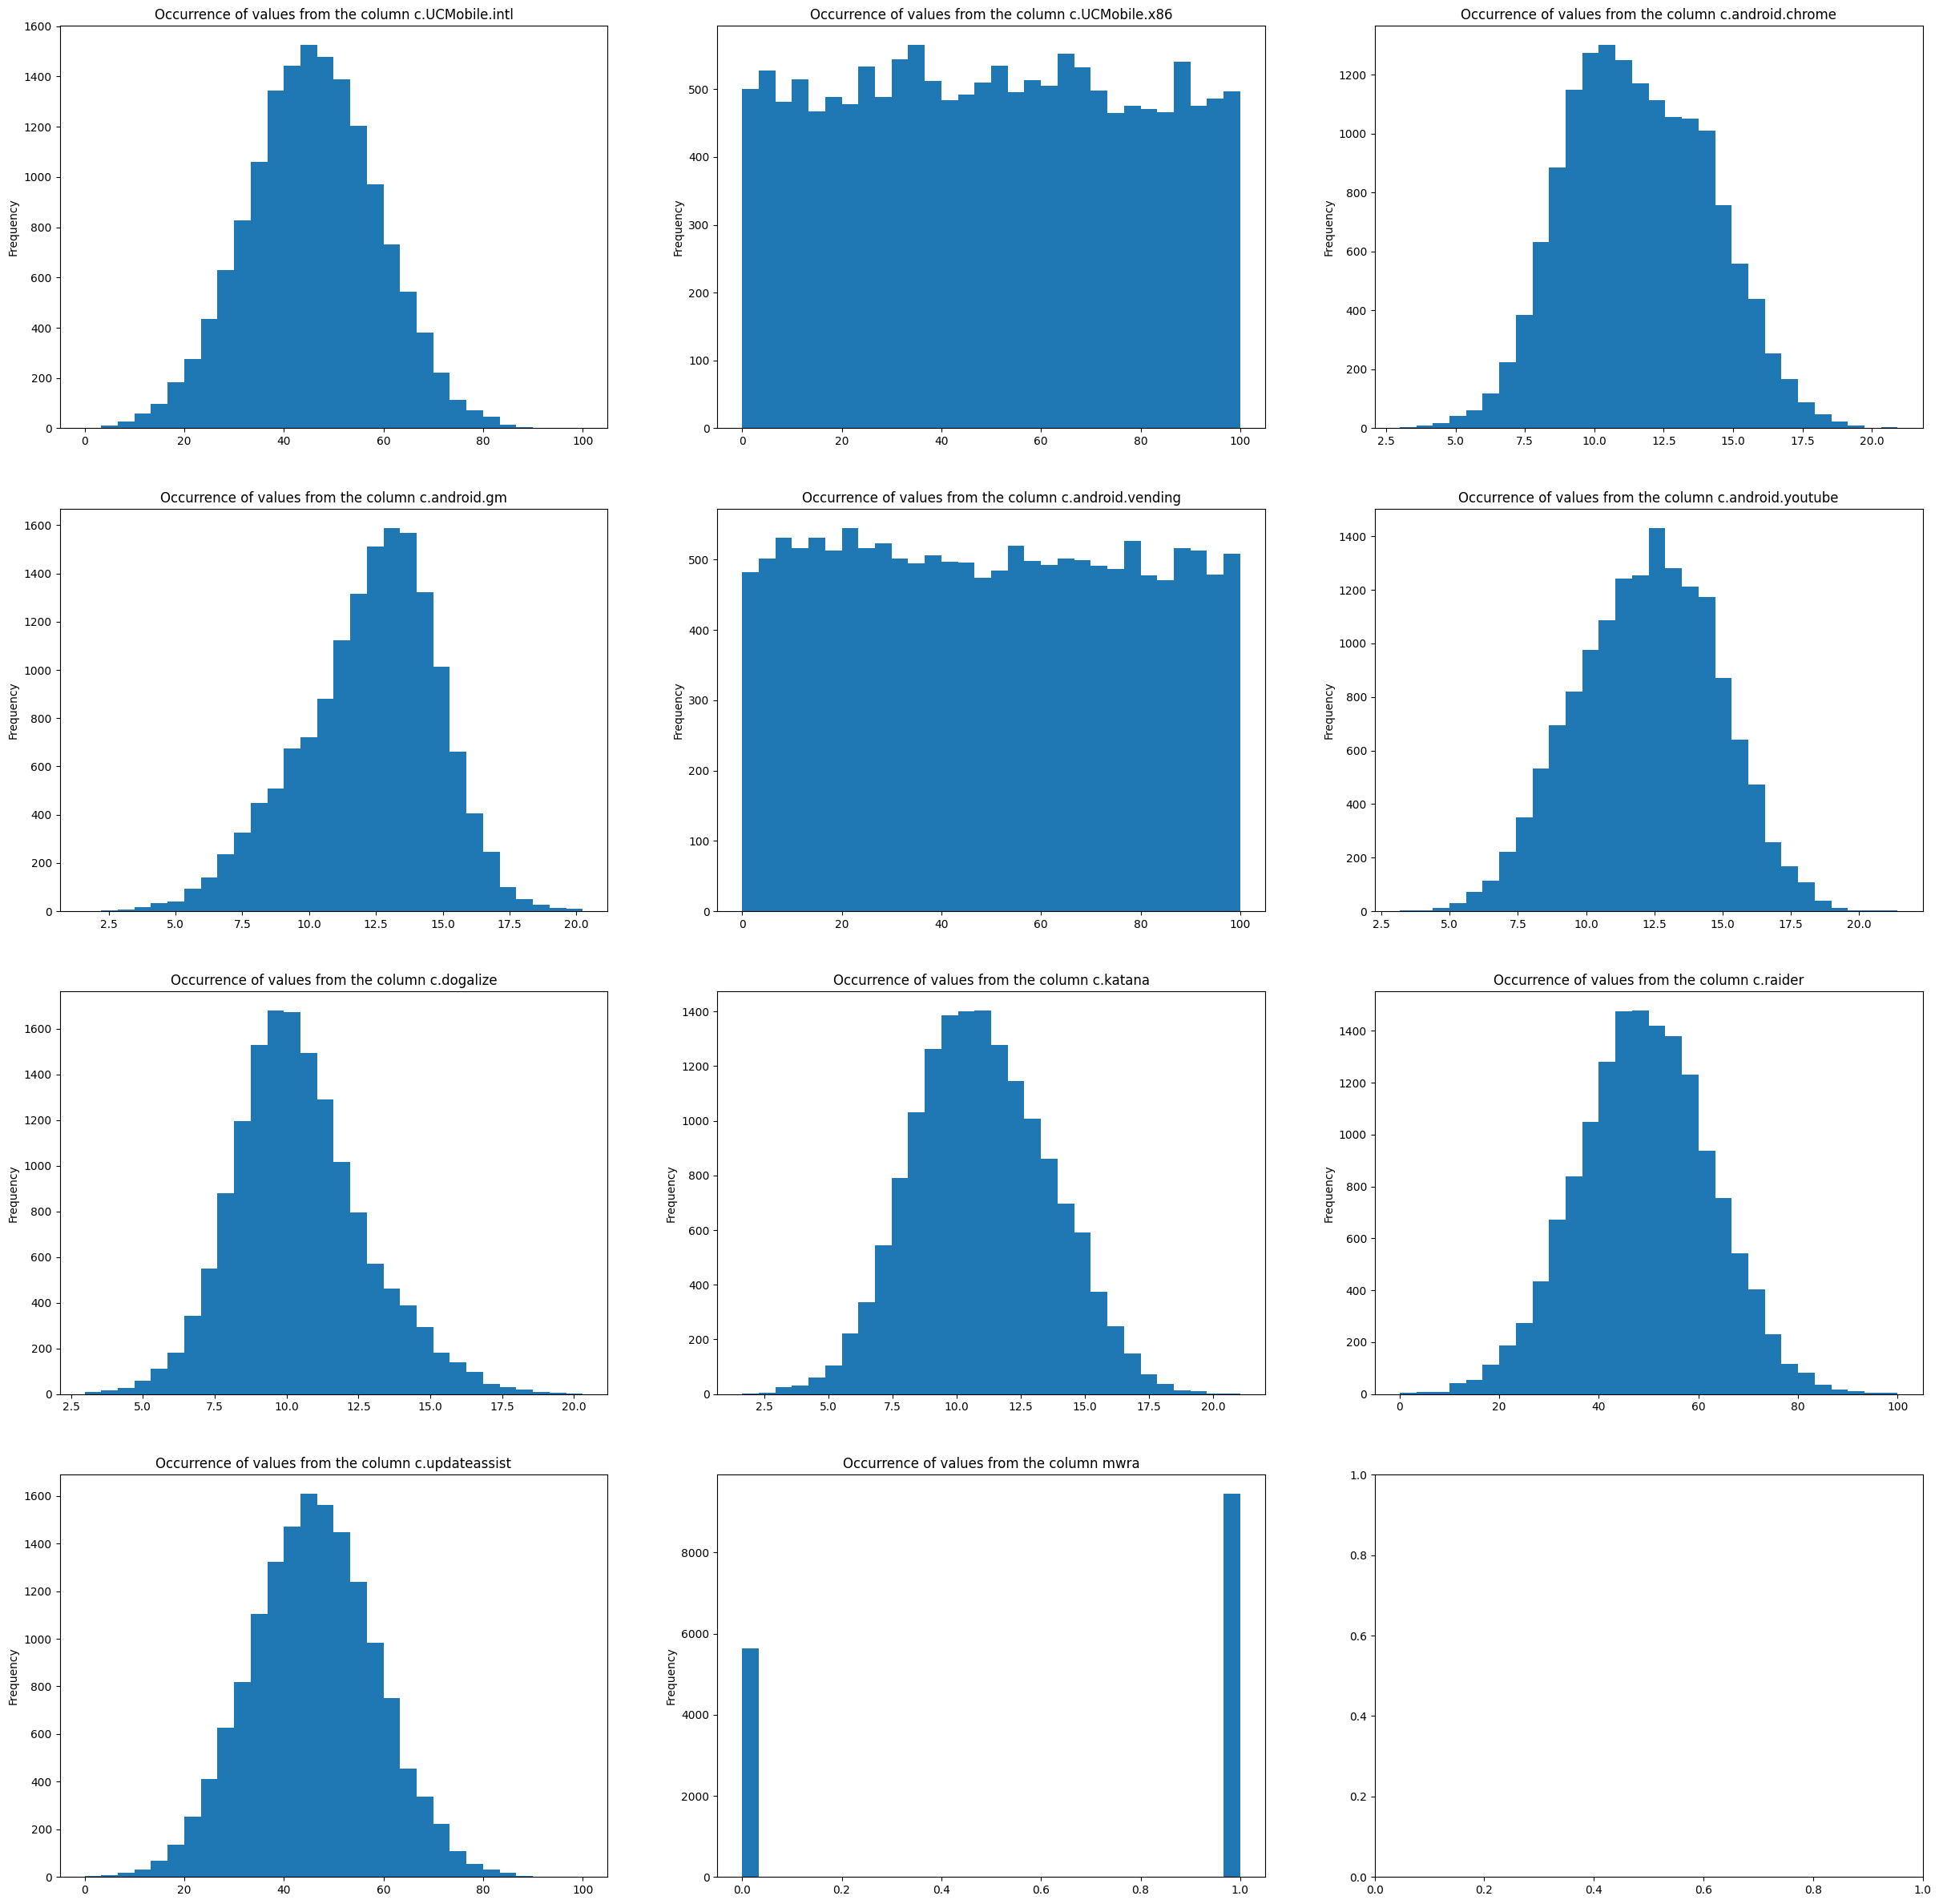

In [18]:
columns = connections.columns.difference(['imei', 'ts'])

fig, axes = plt.subplots(nrows=(len(columns)//2) - 1, ncols=3,figsize=(30, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    connections[col].plot.hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Occurrence of values from the column {col}')


*Data distribution:*

Show distribution plots:

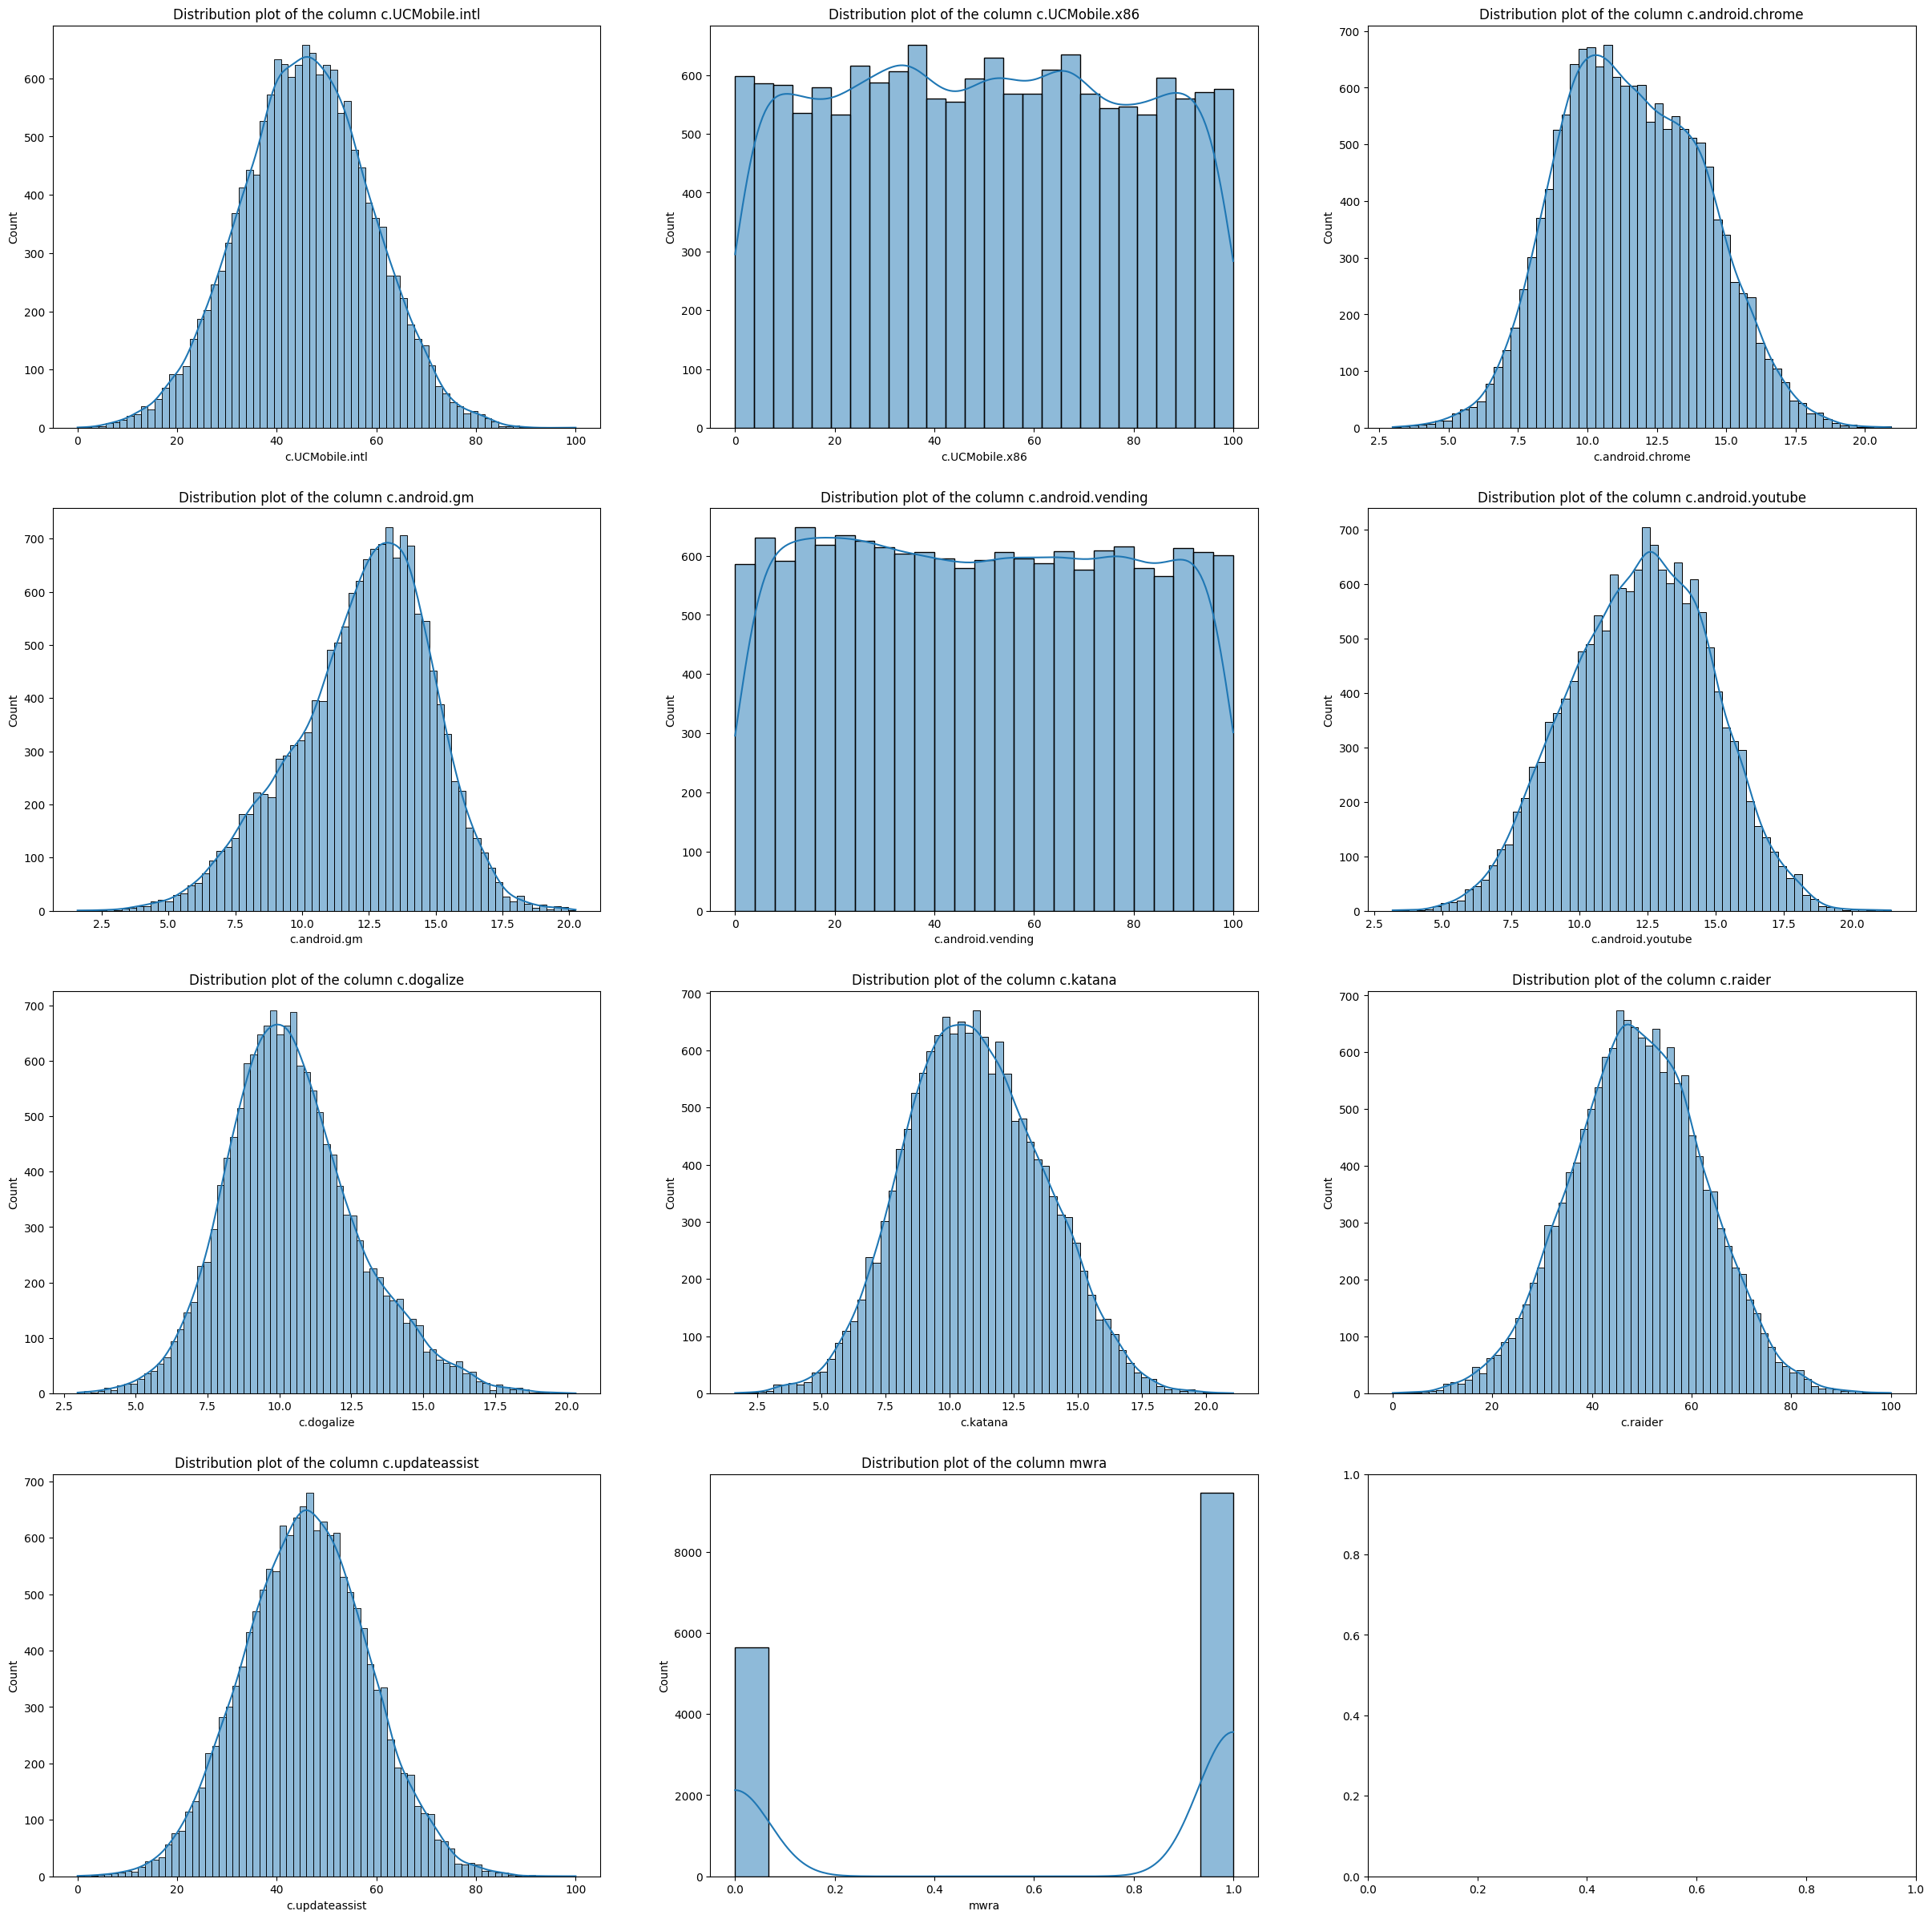

In [19]:
columns = connections.columns.difference(['imei', 'ts'])

fig, axes = plt.subplots(nrows=(len(columns)//2) - 1, ncols=3,figsize=(30, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(connections[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution plot of the column {col}')


Show distribution via boxplot:
- minimum: the smallet value of the data
- first quartile: the first 23% of data
- median: middle value of data (that line in the box)
- maximum: the largest value of the data

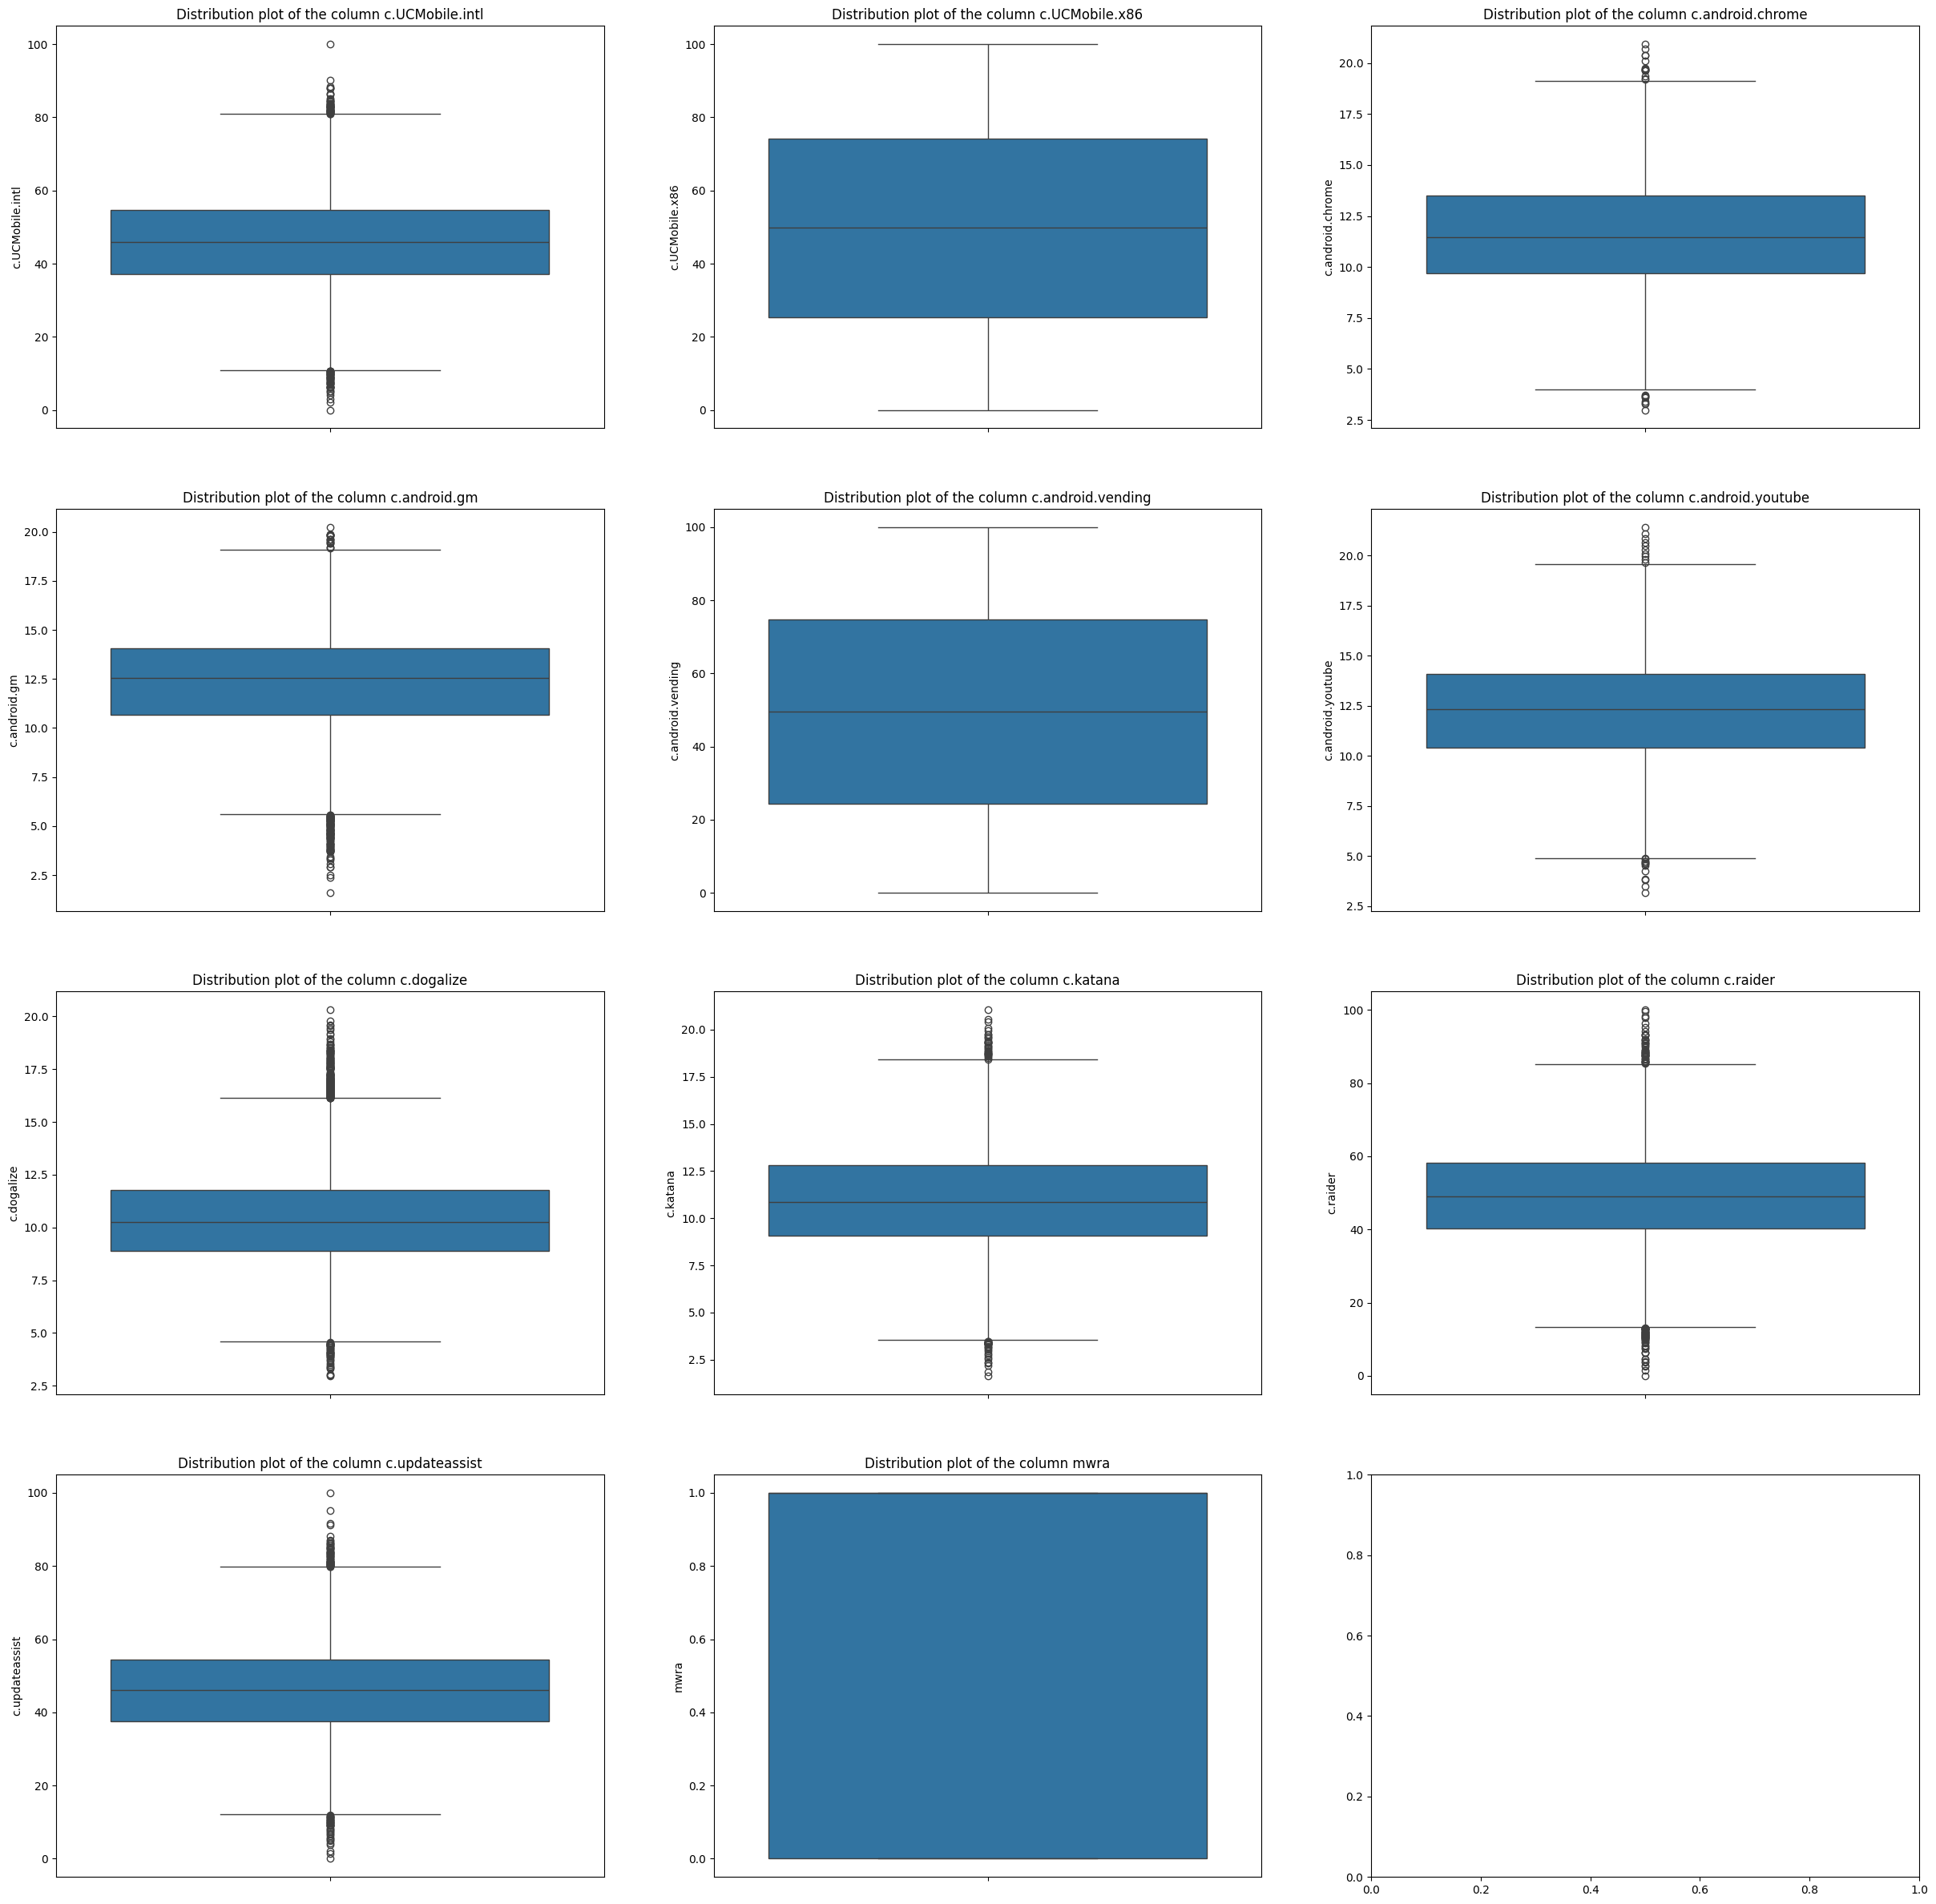

In [20]:
columns = connections.columns.difference(['imei', 'ts'])

fig, axes = plt.subplots(nrows=(len(columns)//2) - 1, ncols=3,figsize=(30, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(connections[col], ax=axes[i])
    axes[i].set_title(f'Distribution plot of the column {col}')

Summary of the distribution of the attributes:

In [21]:
connections_data = connections.columns.difference(['imei', 'ts'])

for col in connections_data:
    data = connections[col].describe()
    print(f'### Distribution of col {col}: ###\n{data}\n')

### Distribution of col c.UCMobile.intl: ###
count    15092.000000
mean        45.847281
std         13.067914
min          0.000000
25%         37.116653
50%         45.841985
75%         54.669180
max        100.000000
Name: c.UCMobile.intl, dtype: float64

### Distribution of col c.UCMobile.x86: ###
count    15092.000000
mean        49.758584
std         28.693358
min          0.000000
25%         25.365020
50%         49.822055
75%         74.106212
max        100.000000
Name: c.UCMobile.x86, dtype: float64

### Distribution of col c.android.chrome: ###
count    15092.000000
mean        11.601913
std          2.576451
min          2.985830
25%          9.686500
50%         11.462210
75%         13.487845
max         20.927980
Name: c.android.chrome, dtype: float64

### Distribution of col c.android.gm: ###
count    15092.000000
mean        12.255218
std          2.563193
min          1.596520
25%         10.666015
50%         12.563215
75%         14.059870
max         20.238460
Na

---------------------------------------------------
#### Pairwise data analysis: Identify relationships and dependencies between pairs of attributes.


Bivariate analysis = Pair analysis.
To see correlation between two variables/attributes

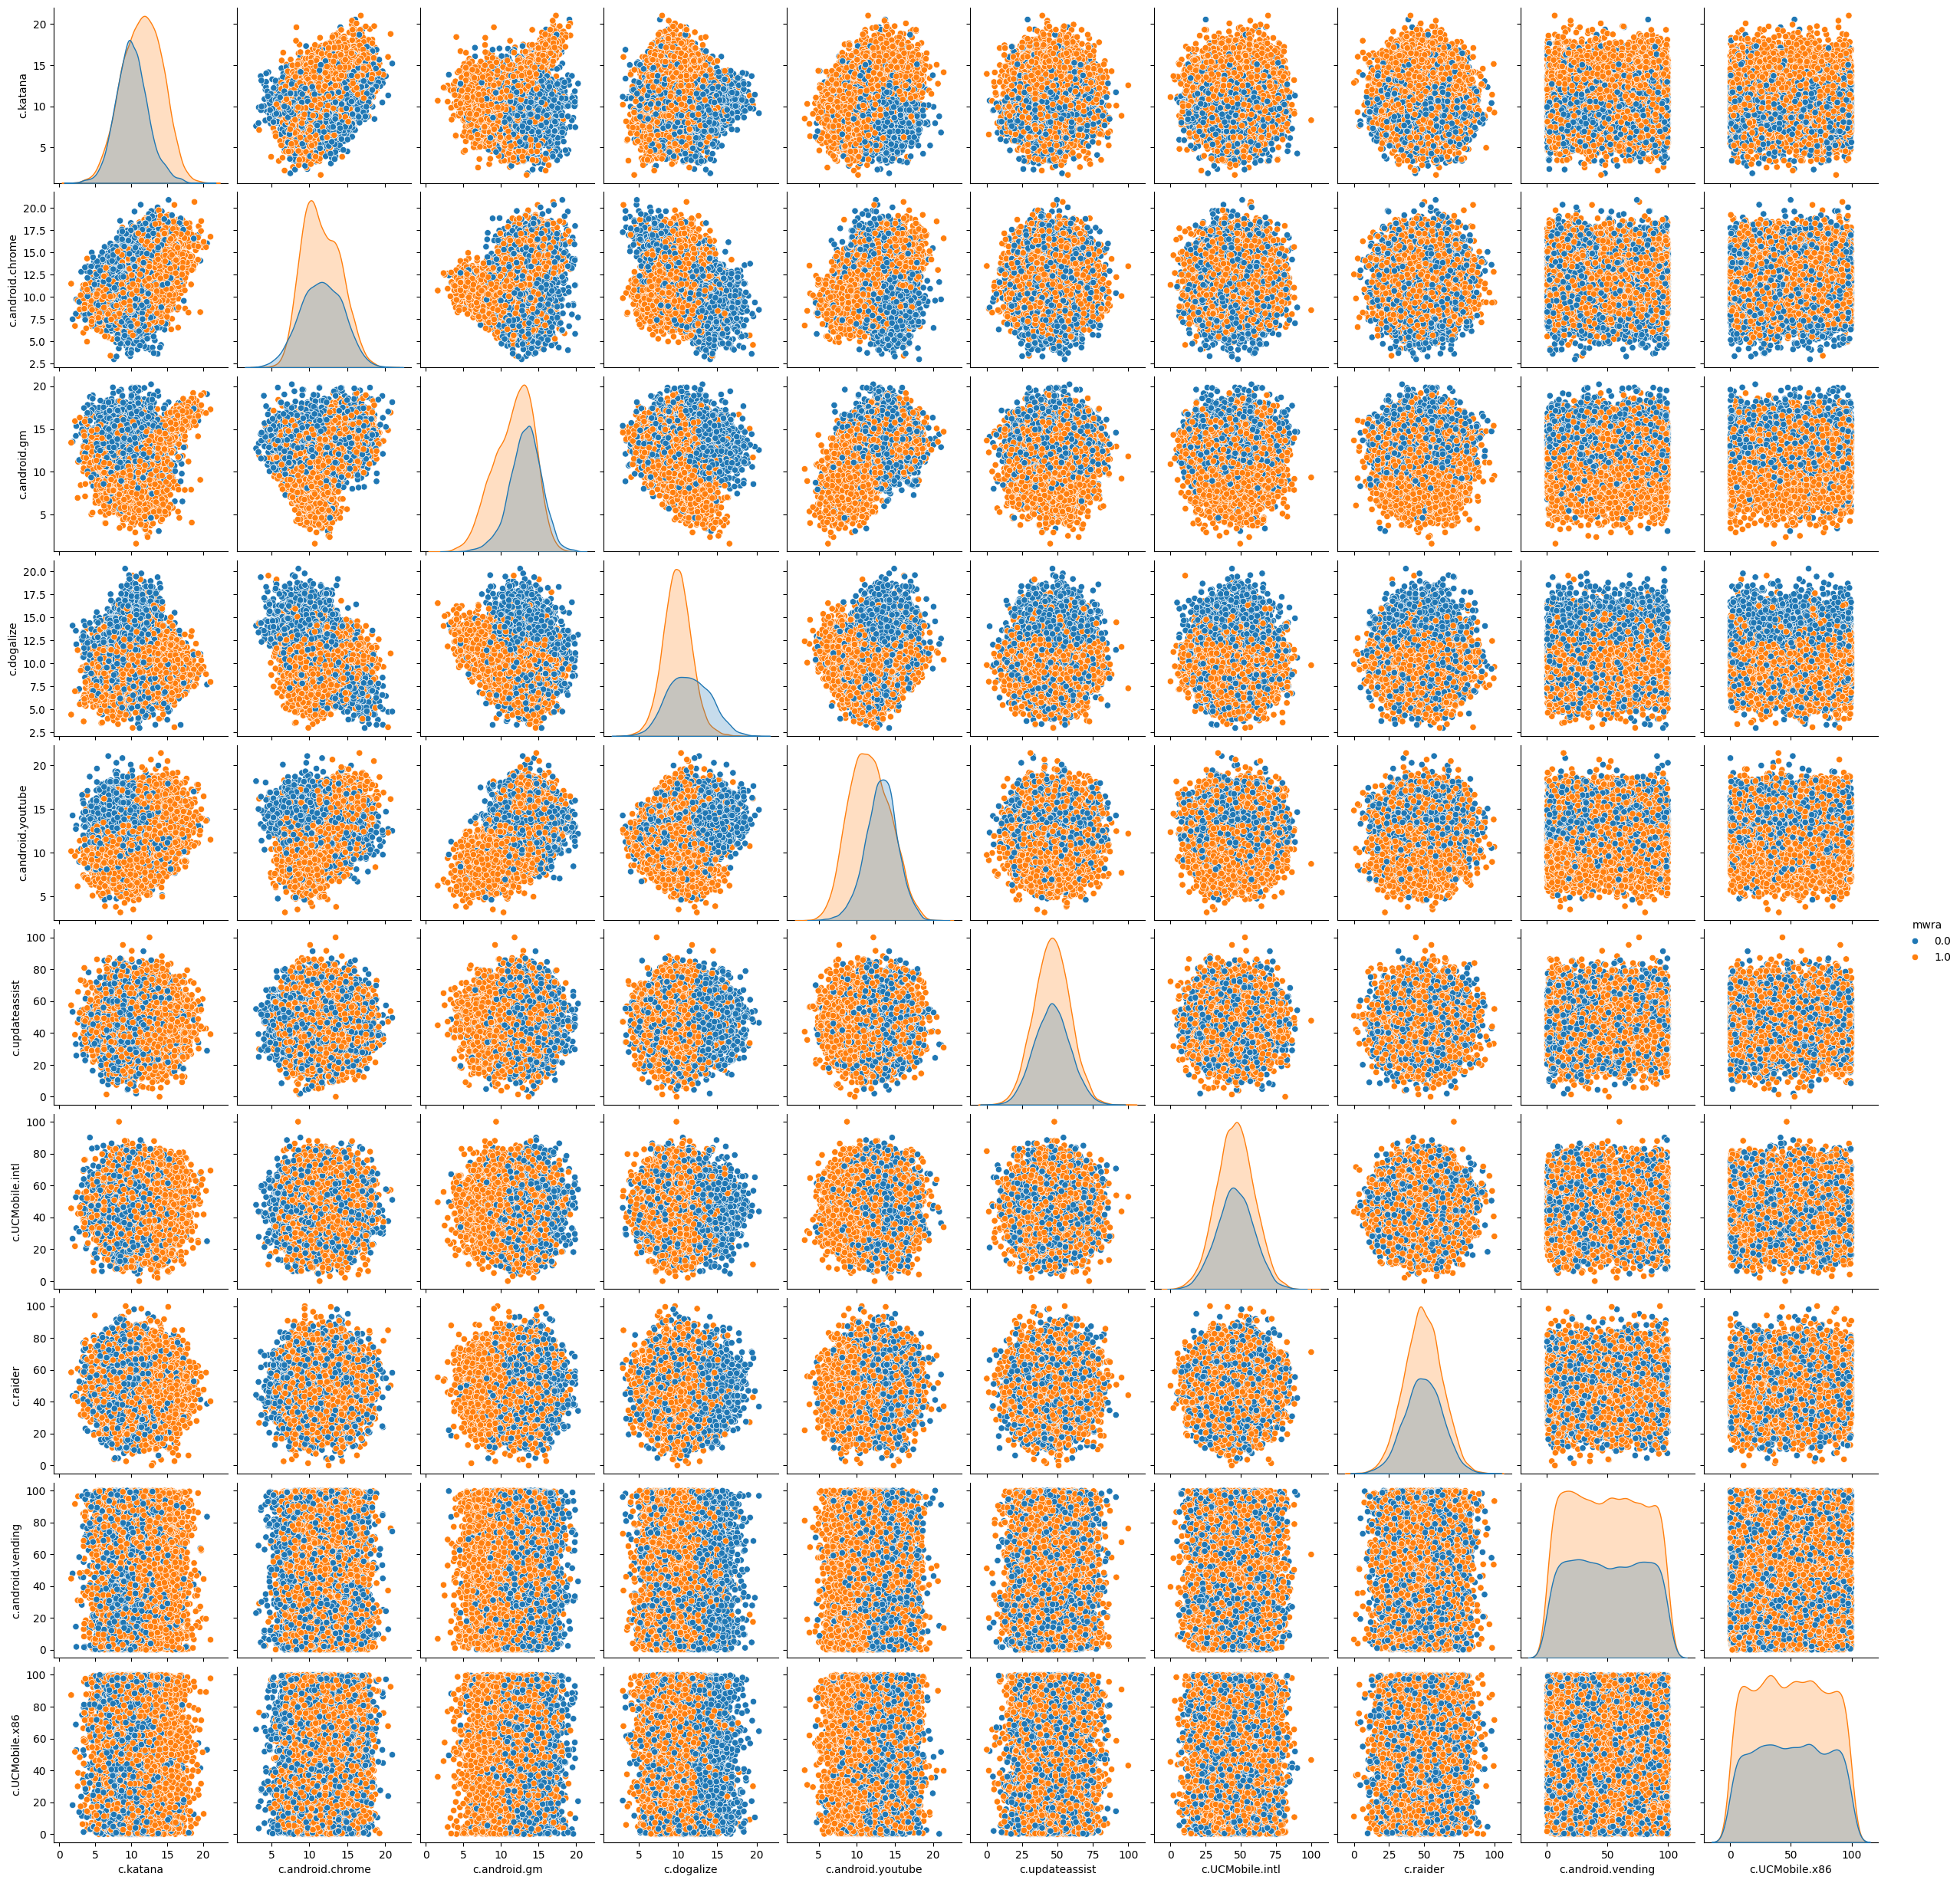

In [22]:
sns.pairplot(connections.drop(columns=['imei', 'ts']), hue='mwra')

Compare the distribution between columns c.dogalize and c.updateassist:

In [23]:
# takes waay tooo long
#sns.boxplot(x='c.dogalize', y='c.updateassist', data=connections)

Correlation - how strong linear relationship is of the two values

Pearson correlation: 0.440


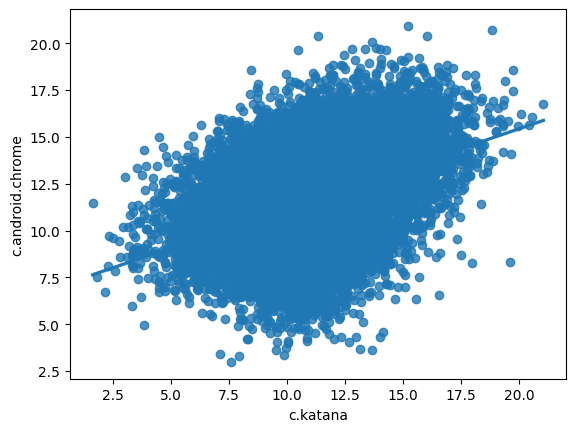

In [24]:
sns.regplot(x="c.katana", y="c.android.chrome", data=connections)
print("Pearson correlation: %.3f" % connections['c.katana'].corr(connections['c.android.chrome']))

Correlation it the table, summary:

In [25]:
connections.corr(numeric_only=True)

imei      mwra  c.katana  c.android.chrome  \
imei               1.000000 -0.000506  0.002984          0.009973   
mwra              -0.000506  1.000000  0.253975         -0.000698   
c.katana           0.002984  0.253975  1.000000          0.440491   
c.android.chrome   0.009973 -0.000698  0.440491          1.000000   
c.android.gm       0.012178 -0.285003  0.261719          0.302061   
c.dogalize        -0.014031 -0.314610 -0.056870         -0.299317   
c.android.youtube  0.009609 -0.282955  0.214295          0.336279   
c.updateassist    -0.006181 -0.004872 -0.005600         -0.002080   
c.UCMobile.intl    0.001607  0.001310  0.017238          0.019652   
c.raider          -0.008165 -0.008114 -0.009569          0.002862   
c.android.vending -0.002698 -0.010500  0.004281         -0.006816   
c.UCMobile.x86     0.008191 -0.007505  0.002217          0.005651   

                   c.android.gm  c.dogalize  c.android.youtube  \
imei                   0.012178   -0.014031           0.009609   
mwra                  -0.285003   -0.314610          -0.282955   
c.katana               0.261719   -0.056870           0.214295   
c.android.chrome       0.302061   -0.299317           0.336279   
c.android.gm           1.000000   -0.054984           0.514237   
c.dogalize            -0.054984    1.000000           0.176557   
c.android.youtube      0.514237    0.176557           1.000000   
c.updateassist        -0.003355    0.002249           0.004275   
c.UCMobile.intl        0.018509   -0.016619           0.000672   
c.raider               0.004925    0.008874          -0.004285   
c.android.vending     -0.007051    0.006125          -0.007668   
c.UCMobile.x86         0.004187   -0.007353           0.002179   

                   c.updateassist  c.UCMobile.intl  c.raider  \
imei                    -0.006181         0.001607 -0.008165   
mwra                    -0.004872         0.001310 -0.008114   
c.katana                -0.005600         0.017238 -0.009569   
c.android.chrome        -0.002080         0.019652  0.002862   
c.android.gm            -0.003355         0.018509  0.004925   
c.dogalize               0.002249        -0.016619  0.008874   
c.android.youtube        0.004275         0.000672 -0.004285   
c.updateassist           1.000000        -0.006131 -0.010725   
c.UCMobile.intl         -0.006131         1.000000  0.020255   
c.raider                -0.010725         0.020255  1.000000   
c.android.vending       -0.000556        -0.003844 -0.009166   
c.UCMobile.x86          -0.011638        -0.010971  0.001396   

                   c.android.vending  c.UCMobile.x86  
imei                       -0.002698        0.008191  
mwra                       -0.010500       -0.007505  
c.katana                    0.004281        0.002217  
c.android.chrome           -0.006816        0.005651  
c.android.gm               -0.007051        0.004187  
c.dogalize                  0.006125       -0.007353  
c.android.youtube          -0.007668        0.002179  
c.updateassist             -0.000556       -0.011638  
c.UCMobile.intl            -0.003844       -0.010971  
c.raider                   -0.009166        0.001396  
c.android.vending           1.000000       -0.003154  
c.UCMobile.x86             -0.003154        1.000000

Show correlations through heatmap to visualize numerical values between columns:

<Axes: >

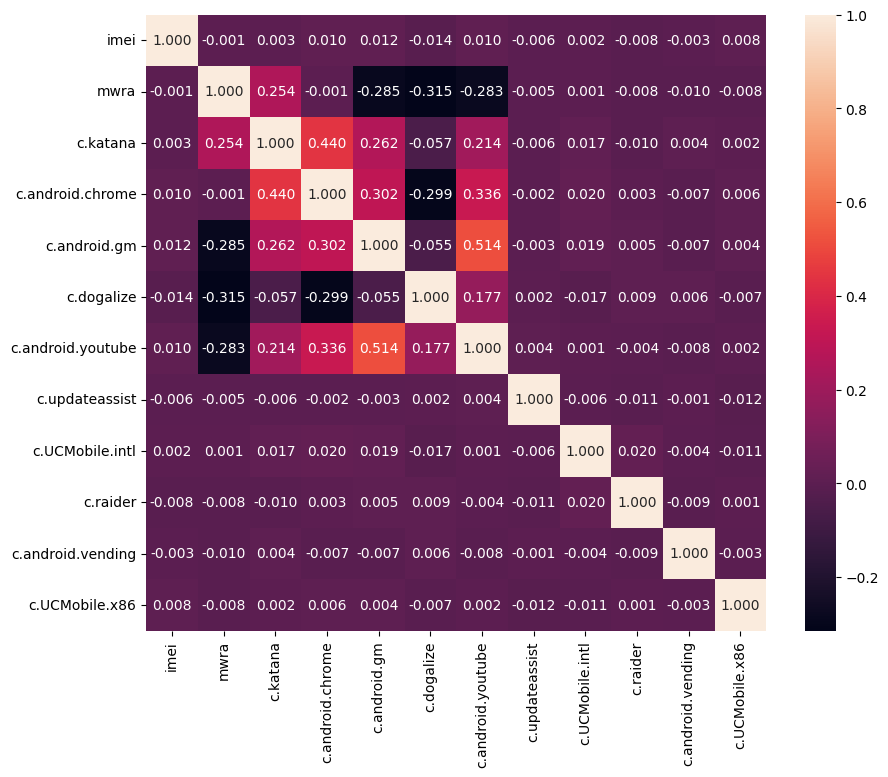

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(connections.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

--------------------------------------------------------------------
#### Paired data analysis: Identify dependencies between the predicted variable and other variables (potential predictors).

Let's see through the *regplot* if there is some relationship between mwra and c.katana. From the *heatmap*, it is obvious that only c.katana has positive value to mwra.

<Axes: >

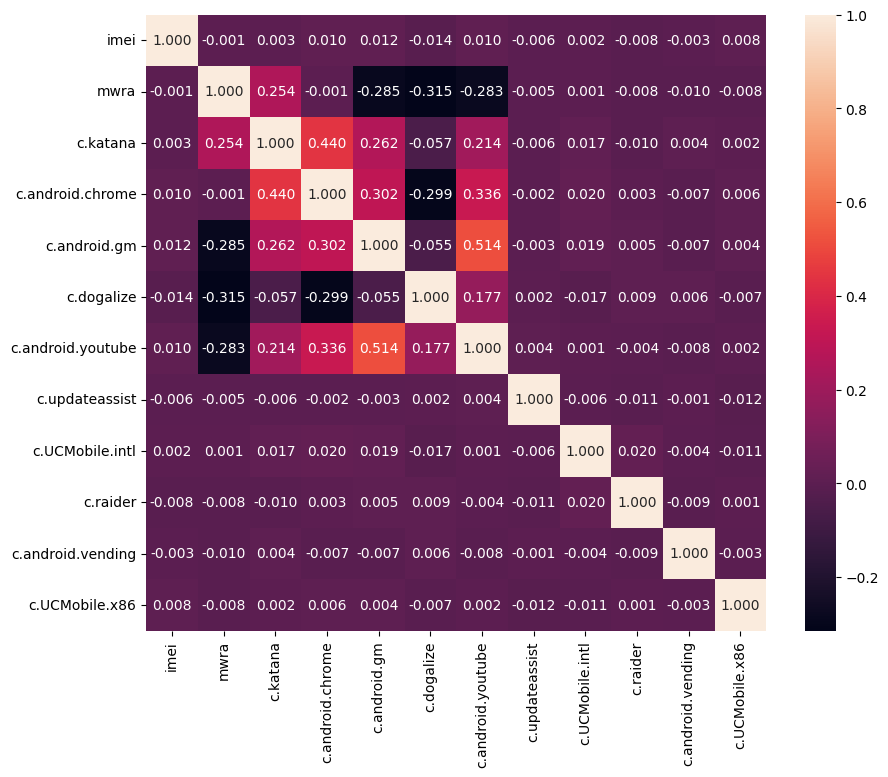

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(connections.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

Pearson correlation: 0.254


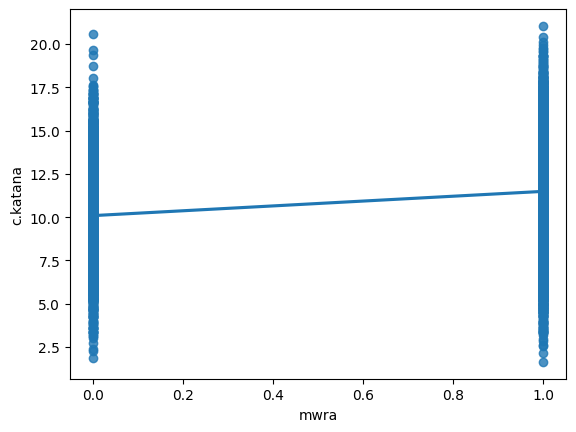

In [28]:
sns.regplot(x="mwra", y="c.katana", data=connections)
print("Pearson correlation: %.3f" % connections['mwra'].corr(connections['c.katana']))

Show boxplot to compare c.katana with mwra. The median is higher where mwra is 1.0

<Axes: xlabel='mwra', ylabel='c.katana'>

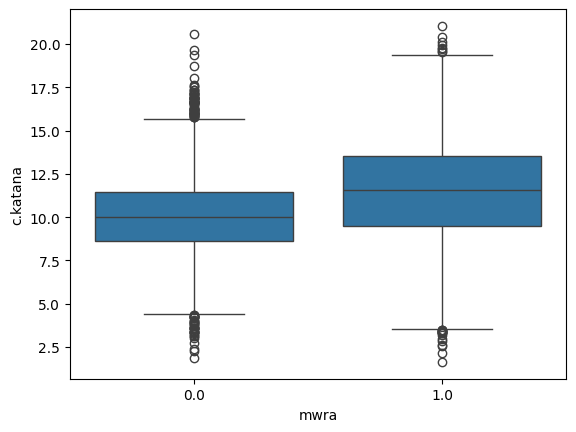

In [29]:
sns.boxplot(x='mwra', y='c.katana', data=connections)

----------------------------------------------------------------
Document your initial thought for solving the project assignment, e.g. are some attributes dependent on each other? which attributes does the predicted variable depend on? Is it necessary to combine records from multiple files?

Attributes dependent on each other:
- c.katana with c.android.chrome
- c.katana with c.android.gm
- c.katana with c.android.youtube
- c.android.chrome with c.android.gm
- c.dogalize with c.android.youtube
- c.dgalize with c.android.updateassist

Attributes dependant on mwra:
- only: c.katana

Important columns + mwra positive values: 
- mwra
- c.katana + 0.254
- c.UCMobile.intl + 0.001
- c.android.chrome
- c.android.gm
- c.android.youtube
- c.android.dogalize

I think that yes, we should merge connections with procceses

------
### 1.2 A - Problem identification

Duplicates:

In [30]:
print("Number of duplicates now: ",connections.duplicated().sum())
print("Number of rows now: ",connections.shape[0])

Number of duplicates now:  179
Number of rows now:  15092


In the dataset, there are 179 duplicated rows. We need to remove them.

In [31]:
connections.drop_duplicates(inplace=True)
print("Number of duplicates now: ",connections.duplicated().sum())
print("Number of rows now: ",connections.shape[0])

Number of duplicates now:  0
Number of rows now:  14913


#### Data casting:

From previous analysis we can see that the column ts is not in the datetime format. We need to convert it.


In [32]:
connections['ts'] = pd.to_datetime(connections['ts'])

connections['ts'].head()

0   2018-05-05 10:00:00
1   2018-05-05 10:01:00
2   2018-05-05 10:02:00
3   2018-05-05 10:03:00
4   2018-05-05 10:04:00
Name: ts, dtype: datetime64[ns]

Furthermore, mwra is simply a binary value, so we can convert it to bool.

In [33]:
# check unique values prior to conversion
print(connections['mwra'].unique())

connections['mwra'] = connections['mwra'].astype(bool)

[1. 0.]


In [34]:
connections.dtypes

ts                   datetime64[ns]
imei                          int64
mwra                           bool
c.katana                    float64
c.android.chrome            float64
c.android.gm                float64
c.dogalize                  float64
c.android.youtube           float64
c.updateassist              float64
c.UCMobile.intl             float64
c.raider                    float64
c.android.vending           float64
c.UCMobile.x86              float64
dtype: object

### 1.2 B - Missing values


In [35]:
# Check for missing values
print("Number of null value in the whole dataset: ", connections.isnull().sum().sum())
print("Number of na value in the whole dataset: ", connections.isna().sum().sum())

Number of null value in the whole dataset:  0
Number of na value in the whole dataset:  0


There are no missing values in the dataset. 

We still need to show how to fill missing values in the dataset, so let's delete some values and fill them with the mean value as an example.

In [36]:
# cloning the dataset
connections_missing = connections.copy()

# let's delete 2.5% of the values in the column c.katana
connections_missing.loc[connections_missing.sample(frac=0.025).index, 'c.katana'] = np.nan

# Side note: If we deleted more than 5%, we shouldn't use this method.

# fill missing values with the imputer method
imputer = SimpleImputer(strategy='mean')
connections_missing['c.katana'] = imputer.fit_transform(connections_missing[['c.katana']])
connections_missing

ts                 imei   mwra  c.katana  \
0     2018-05-05 10:00:00  3590433799317662188   True  10.99774   
1     2018-05-05 10:01:00  3590433799317662394   True  11.08234   
2     2018-05-05 10:02:00  3590433799317661834  False  11.49582   
3     2018-05-05 10:03:00  8630330696303481289  False  10.50935   
4     2018-05-05 10:04:00  8630330696303481149  False  10.25989   
...                   ...                  ...    ...       ...   
14908 2018-05-15 18:28:00   863033069630348982  False  10.17018   
14909 2018-05-15 18:29:00  3590433799317661594   True  13.52429   
14910 2018-05-15 18:30:00  8630330696303481057  False  10.90390   
14911 2018-05-15 18:31:00  3590433799317662188   True   8.47958   
14912 2018-05-15 18:32:00  3590433799317662204  False   8.96624   

       c.android.chrome  c.android.gm  c.dogalize  c.android.youtube  \
0              11.05477       6.03999    12.49767            8.59956   
1               9.64636       8.64167    12.60788            9.84197   
2              12.27416      11.59681    12.99258            9.74923   
3              11.41774      14.43350    12.91018           13.93857   
4              14.46448      14.02728     8.58832           13.04853   
...                 ...           ...         ...                ...   
14908          13.05328      10.93398     8.90130           10.98438   
14909          13.82647      13.60043    11.46229           17.82659   
14910           8.77998      15.71295    14.06695           14.61081   
14911           8.11147      15.36153     4.71766           12.32035   
14912           7.91019      11.08831    12.05655           12.06833   

       c.updateassist  c.UCMobile.intl  c.raider  c.android.vending  \
0            14.00953         52.54470  43.93493           66.86890   
1            38.27736         44.56009  47.40309            9.56533   
2            57.41411         36.83333  58.51427           45.83339   
3            31.57549         41.34296  60.12589           81.04877   
4            49.47100         38.86755  57.83154           28.15473   
...               ...              ...       ...                ...   
14908        42.68299         24.33673  55.77978           61.88385   
14909        27.86611         25.41132  33.45424           47.08862   
14910        36.67428         47.42102  46.73967           20.31325   
14911        55.91226         48.17744  45.72867           68.41544   
14912        63.50117         45.87526  87.68716           73.56991   

       c.UCMobile.x86  
0            46.35705  
1            33.53140  
2            20.26636  
3            80.43563  
4            43.36029  
...               ...  
14908        96.81395  
14909        86.05805  
14910        32.53962  
14911        56.53572  
14912        20.16564  

[14913 rows x 13 columns]

### 1.2 C - Outlier detection

Let's go and use the Standard Deviation Method to detect outliers. Based on the previous analysis, we will exclude the columns ts, imei and mwra- since they are non continues data. And also excluding columns android.vending and UCmobile.x86, because they are not gaussian.

In [37]:
# Check for outliers with the Standard Deviation Method
outliers = []
for col in connections.columns.difference(['ts', 'imei', 'mwra', 'c.android.vending', 'c.UCMobile.x86']):
    if connections[col].dtype == 'float64':
        std = connections[col].std()
        mean = connections[col].mean()
        lower, upper = mean - 3*std, mean + 3*std
        outliers.append(connections[(connections[col] < lower) | (connections[col] > upper)].shape[0])

outliers = pd.Series(outliers, index=connections.columns.difference(['ts', 'imei', 'mwra', 'c.android.vending', 'c.UCMobile.x86']))
outliers

c.UCMobile.intl      24
c.android.chrome     20
c.android.gm         47
c.android.youtube    14
c.dogalize           77
c.katana             30
c.raider             37
c.updateassist       39
dtype: int64

Let's remove the outliers from the dataset for this time.

In [38]:
# Remove outliers
for col in connections.columns.difference(['ts', 'imei', 'mwra', 'c.android.vending', 'c.UCMobile.x86']):
    if connections[col].dtype == 'float64':
        std = connections[col].std()
        mean = connections[col].mean()
        lower, upper = mean - 3*std, mean + 3*std
        connections = connections[(connections[col] >= lower) & (connections[col] <= upper)]
        
# Check the number of rows after removing the outliers
connections.shape[0]

14631

## 1.3 Hypothesis testing

From the analysis of data and attributes, and then the cleaning of data we came to a conclusion that there is some relationship/correlation between mwra and c.katana. The Facebook presents the usage of this app in the device. What is also interesting, there is also a correlation between c.katana and c.android.chrome, which can have an impact on the dataset processes. But that will be in the further analysis in the phase 2. Let's see if there is a statistically significant difference in usage of the Facebook where malware activity was detected. We will split the data into two groups based on the mwra column and then compare the distributions of the c.katana column in both groups.

Let's look at the data -> compare c.katana when it's mwra value is True and when it's False:

In [39]:
# Split the data into two groups based on the mwra column.
mwra_true = connections[connections['mwra'] == True]
mwra_false = connections[connections['mwra'] == False]

Text(0.5, 1.0, 'Distribution of c.katana when mwra is False')

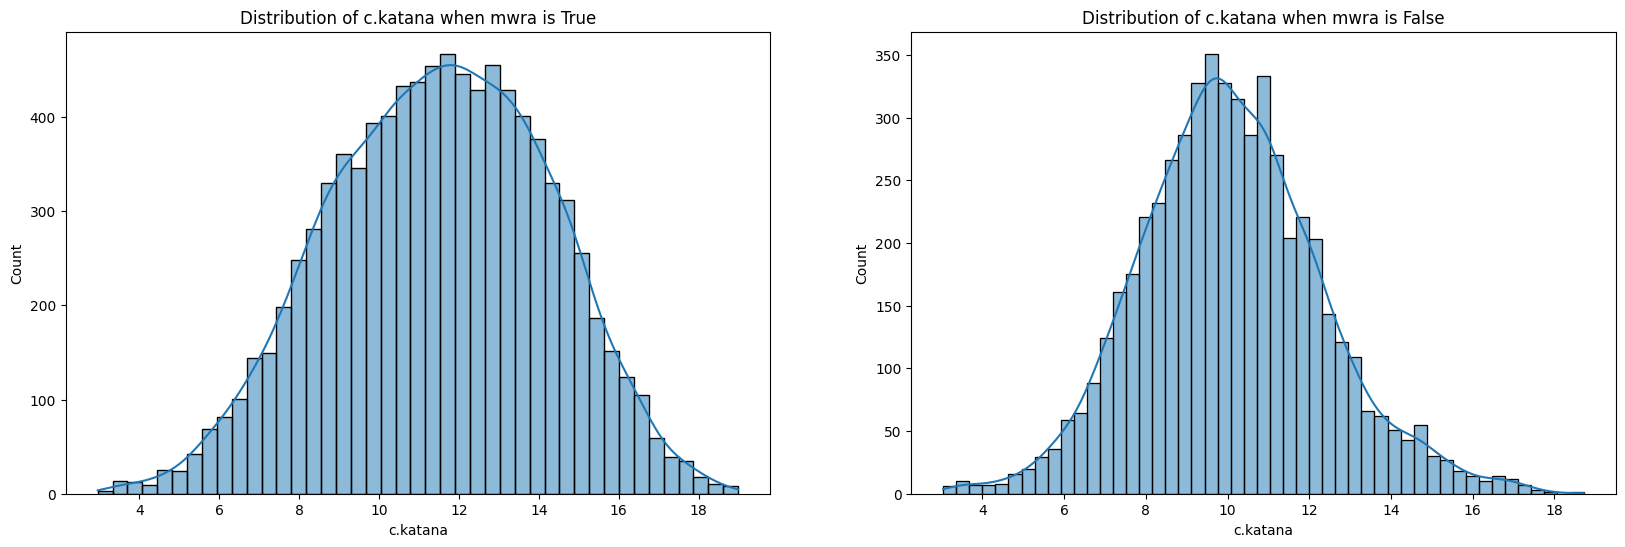

In [40]:
# show the number of records in each group and plot the distributions of the p.android.chrome column
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(mwra_true['c.katana'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of c.katana when mwra is True')
sns.histplot(mwra_false['c.katana'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of c.katana when mwra is False')

<Axes: xlabel='mwra', ylabel='c.katana'>

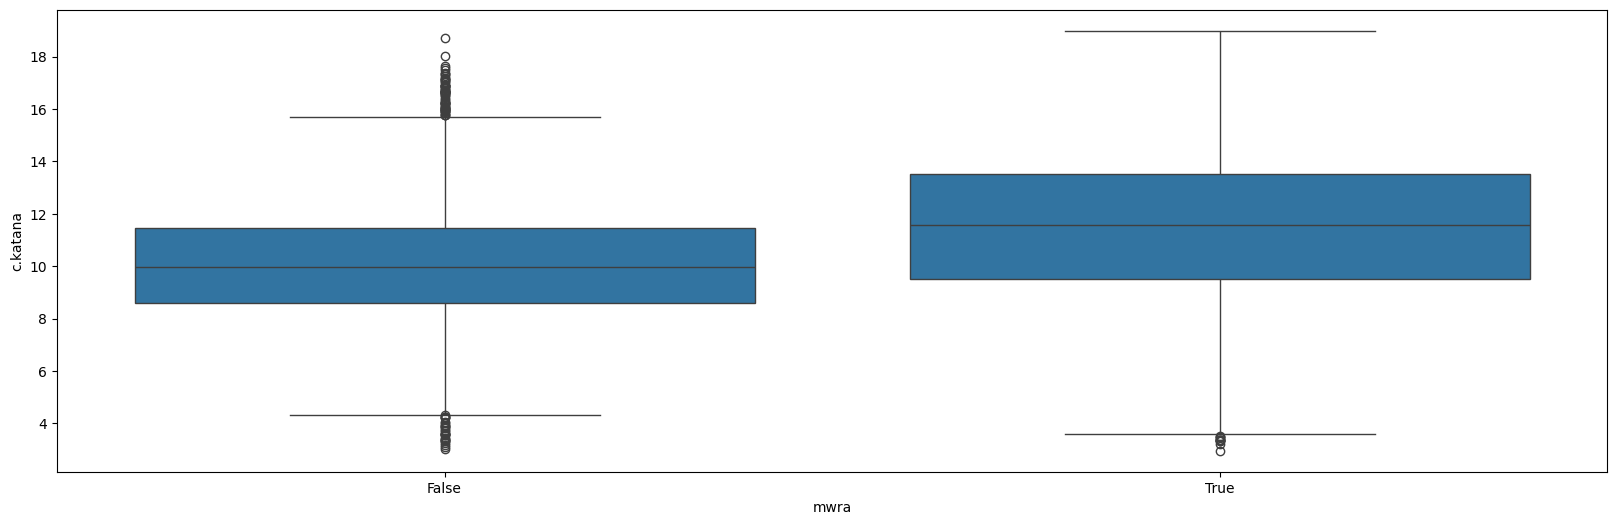

In [41]:
# now let's plot their boxplots
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='mwra', y='c.katana', data=connections)

The result is that, mwra with True value has higher numbers than mwra with False.

In [42]:
# There are some outliers lets clear them.
# We are using the same exact method from our week 4 HW.
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)

    return a[(a > upper) | (a < lower)]

# identify outliers
mwra_true_outliers = identify_outliers(mwra_true['c.katana'])
mwra_false_outliers = identify_outliers(mwra_false['c.katana'])

# number of outliers
print(f'Number of outliers in mwra_true: {mwra_true_outliers.shape[0]}')
print(f'Number of outliers in mwra_false: {mwra_false_outliers.shape[0]}')

# remove outliers
mwra_true = mwra_true.drop(mwra_true_outliers.index)
mwra_false = mwra_false.drop(mwra_false_outliers.index)

Number of outliers in mwra_true: 12
Number of outliers in mwra_false: 95


Text(0.5, 1.0, 'Distribution of c.katana after outliers when mwra is False')

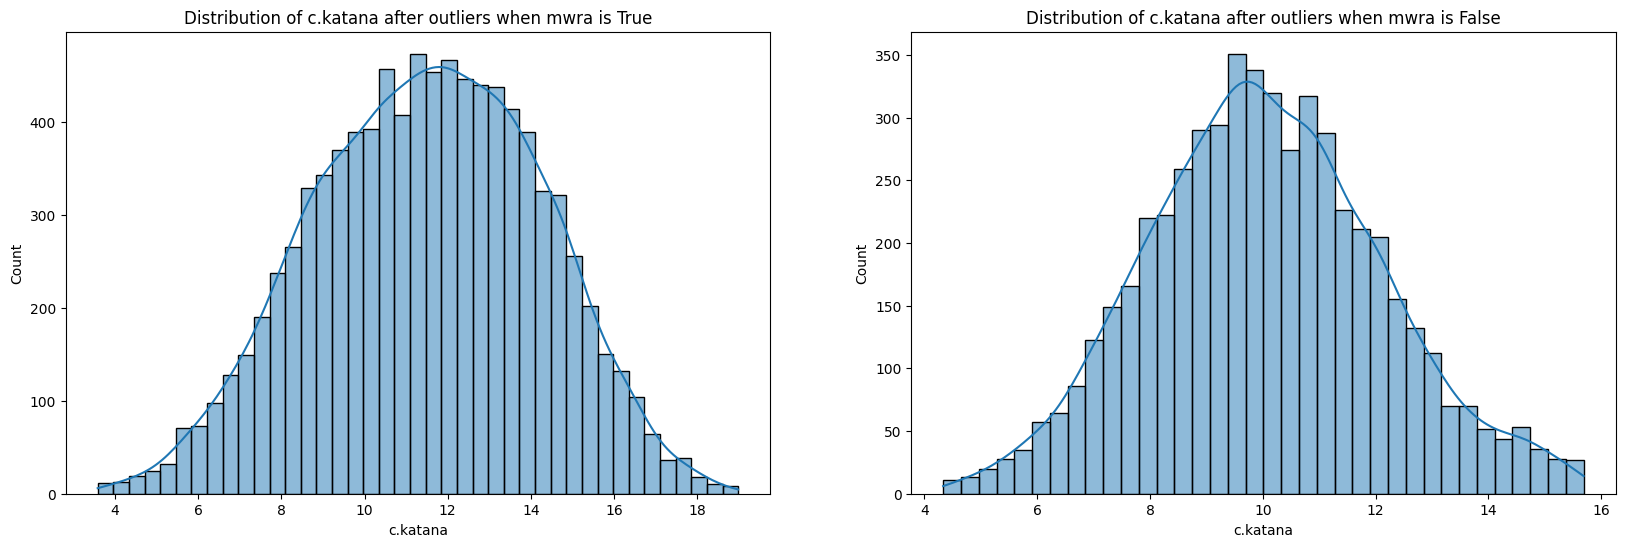

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(mwra_true['c.katana'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of c.katana after outliers when mwra is True')
sns.histplot(mwra_false['c.katana'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of c.katana after outliers when mwra is False')

Let's have a look on z-scores:
   -  **mean = 0:** standard normal distribution
   - **standard deviation = 1**
   
The z-score formula:

    Z = (x - μ) / σ
   - x: data point
   - μ: mean
   - σ: standard deviation

In [44]:
mean_mwra_true = mwra_true['c.katana'].mean()

In [45]:
# std error
std_mwra_true = mwra_true['c.katana'].std()

In [46]:
mean_mwra_false = mwra_false['c.katana'].mean()

In [47]:
# std error
std_mwra_false = mwra_false['c.katana'].std()

In [48]:
# calculate z-score
mwra_true['z_score'] = (mwra_true['c.katana'] - mean_mwra_true) / std_mwra_true
mwra_false['z_score'] = (mwra_false['c.katana'] - mean_mwra_false) / std_mwra_false

z_scores = pd.concat([mwra_true, mwra_false])

print(mwra_true[['c.katana', 'z_score']].head())
print(mwra_false[['c.katana', 'z_score']].head())

    c.katana   z_score
0   10.99774 -0.184841
1   11.08234 -0.153762
7   14.38229  1.058513
10  13.18663  0.619274
12  16.97773  2.011978
   c.katana   z_score
2  11.49582  0.704397
3  10.50935  0.229877
4  10.25989  0.109879
5   9.47163 -0.269297
6   9.51801 -0.246987


Z-value represents how far the value in the column is from the mean. The best values are near to 0.

#### Null hypothesis - assumptions made in alternative hypothesis

**$H_0$ (null hypothesis)** (reject the null hypothesis)
     - The usage of Facebook (c.katana) is independent on malware activity
     
**$H_1$ (alternative hypothesis)** (fail to reject the null hypothesis)
     - The usage of Facebook (c.katana) is dependent on malware activity

**α (significance level):** 0.05 
     
The output of the hypothesis test is p-value (probability of occurrence of null hypothesis).
    - if p-value is less than 5%, we reject $H_0$, it is then $H_1$.

Let's try it with t-test:
t = (x̄(mwra true) - x̄ (mwra false)) / √(s^2(mwra true)/n(mwra true) +  s^2(mwra false)/n(mwra false))

- x̄ - sample mean
- s - sample standard deviation
- n - number of examples in the sample
- t - t-statistic


In [49]:
t_statistic, p_value = stats.ttest_ind(mwra_true['c.katana'], mwra_false['c.katana'])

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): The usage of Facebook (c.katana) is dependent on malware activity")
else:
    print("Fail to reject the null hypothesis (H0): The usage of Facebook (c.katana) is independent on malware activity.")

t-statistic: 34.09951582074484
p-value: 3.098700365350823e-245
Reject the null hypothesis (H0): The usage of Facebook (c.katana) is dependent on malware activity


## Verification of assumptions

### Assumption of normality

We test the normality of visually with Q-Q (quantile=quantile) plot to compare probability distributions. But we can also use the Mann-Whitney U-test to compare differences between mwra true and false for normality.


Text(0.5, 1.0, 'Q-Q plot of c.katana when mwra is False')

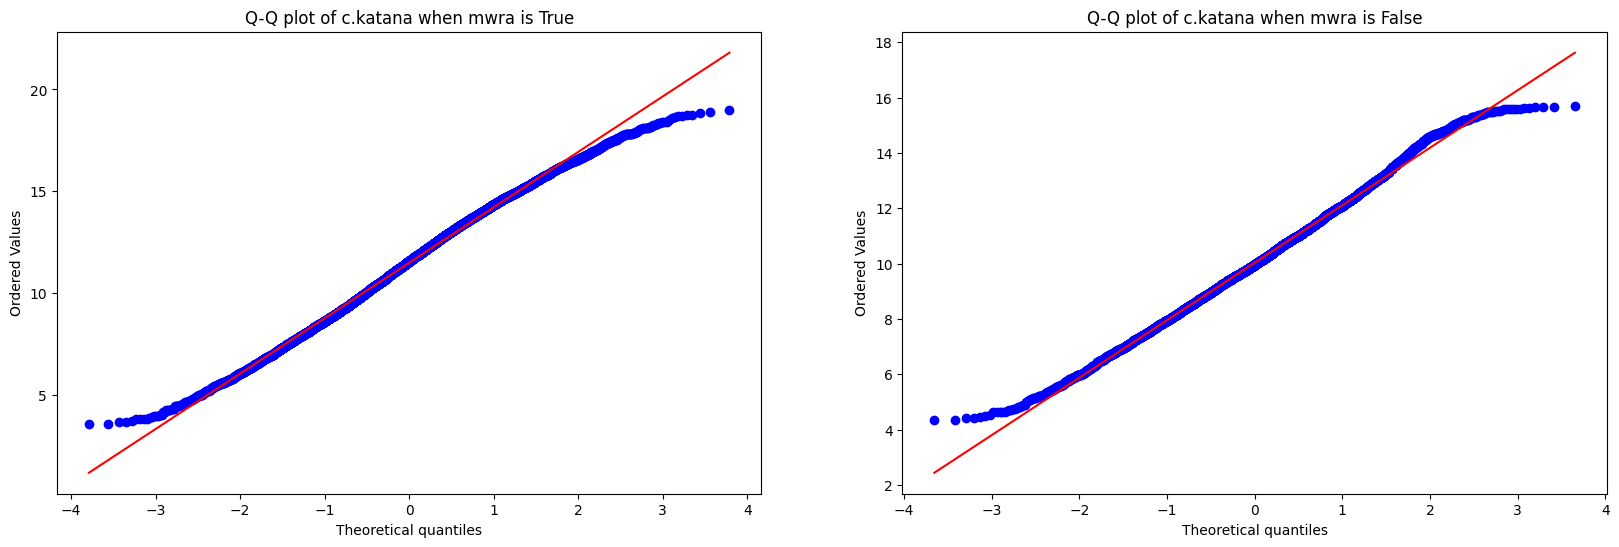

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
stats.probplot(mwra_true['c.katana'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot of c.katana when mwra is True')
stats.probplot(mwra_false['c.katana'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot of c.katana when mwra is False')

- the red line represents normal distribution 
- The blue dots represent the distribution od data 
- The result is that both values mwra true and mwra false follow the red line.

#### Mann-Whitney U-test (Non-parametric statistical test)

How Whitney test works:
- formulas:
    - $U_1$ = $R_1$ - $n_1$($n_1$ + 1)/2
    - $U_2$ = $R_2$ - $n_2$($n_2$ + 1)/2
    - Final result from the calculation: U = min($U_1$, $U_2$)
        - U = statistic for the group
        - R = sum of ranks for the group
        - n = the sample size

In [51]:
u_statistic, p_value = stats.mannwhitneyu(mwra_true['c.katana'], mwra_false['c.katana'], alternative='two-sided')

print(f"U-statistic: {u_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): The usage of Facebook (c.katana) is dependent on malware activity")
else:
    print("Fail to reject the null hypothesis (H0): The usage of Facebook (c.katana) is independent on malware activity.")

U-statistic: 32657083.5
p-value: 1.1158480747274327e-243
Reject the null hypothesis (H0): The usage of Facebook (c.katana) is dependent on malware activity


Same as in the t-test, the $H_0$ hypothesis is rejected, due to low p-value.

#### Kolmogorov-Smirnov test 

D = Max|$F_0$(X) - $F_r$(X)|
- $F_0$(X) = culmulative distribution function of the sample's theoretical distribution of n (sample size)
- $F_r$(X) = the theretical frequency distribution
- D = maximum distance between the  cumulative distribution function of the samples data

In [52]:
D_value, p_value = stats.ks_2samp(mwra_true['c.katana'], mwra_false['c.katana'])

print(f"K-S Statistic (D): {D_value}")
print(f"p-value: {p_value}")

K-S Statistic (D): 0.2766894793964356
p-value: 3.4940319514096064e-228


Thw mwra true and mwra false differ in their distribution of the variable c.katana. That means that $H_0$ hypothesis is rejected, due to low p-value.

### Assumption of homogeneity of variances

#### Levene's test (Are variances equal?)


In [53]:
stat, p_value = stats.levene(mwra_true['c.katana'], mwra_false['c.katana'])

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

Levene's test statistic: 516.7189915866496
p-value: 1.9863070076827017e-112


Again the $H_0$ hypothesis is rejected, due to low p-value.

### Conclusion
The p-value is less than 0.05, so we reject the null hypothesis. There is a statistically significant difference in the usage of Facebook app in the device when malware activity is detected.

----------------
## 1.3 B 
Check whether your statistical tests have enough support from the data, i.e. whether they have sufficiently strong statistical power.

The answer:
- All the statistical tests rejected $H_0$ hypothesis: The usage of Facebook (c.katana) is independent on malware activity. That means that the malware has an impact on the usage of the Facebook app. 
- statistical power:
    - sample size: The p-value is very low, that refers to the large sample size of data. The large sample size is good for statistical power, it is easier for tests to detect the significant differences.
    - effect size -> K-S test: The difference between samples is large, which means high statistical power.
        



In [54]:
mwra_true['c.katana'].size

9178

In [55]:
mwra_false['c.katana'].size

5346